## 1, Import jeopardy

In [5]:
import pandas as pd

jeopard = 'C:/Users/balazs.varga/Documents/BALAZS/USE/REPOS/DSC/HOMEWORK/WEEK6/JEOPARDY_CSV.CSV'

df = pd.read_csv(jeopard)
df.head(2)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe


#### a, Number of rows

In [128]:
print('Number of rows: ' + str(len(df.index)))
print('Number of unique questions: ' + str(df[' Question'].nunique()))
print('Number of unique shows: ' + str(df['Show Number'].nunique()))
print('Number of air dates: ' + str(df[' Air Date'].nunique()))

Number of rows: 216930
Number of unique questions: 216123
Number of unique shows: 3640
Number of air dates: 3640


#### Looks like every row represents a question that appeared in the show. Every "true" question is unique, but "cues" are also listed and not unique. For certain applications we might wish to remove rows containing cues, but as far as I can tell it is not necessary to answer these questions. Will drop duplicate rows, though, if there are any. If I understand 'grain' properly, here it would be daily as there are some months where shows were on a daily basis.

#### b, as a bare minimum it should not contain duplicate rows. there are no duplicate rows here. For point d, the presence of "cues" is a problem as the frequency relates to true questions only, will drop them there. For the rest it does not make a difference

#### c, number of unique shows per year, first need to convert date to proper fromat

In [121]:
df[' Air Date'] = pd.to_datetime(df[' Air Date'])

grouped_year = df.groupby(pd.Grouper(key = ' Air Date', freq = 'Y')).nunique().drop(columns = [' Round', ' Category', ' Value', ' Question', ' Answer',
       'Month'])
print(grouped_year)
print(grouped_year.columns)

            Show Number
 Air Date              
1984-12-31           23
1985-12-31           16
1986-12-31           25
1987-12-31           22
1988-12-31           22
1989-12-31           36
1990-12-31           73
1991-12-31           24
1992-12-31           32
1993-12-31           35
1994-12-31           19
1995-12-31           19
1996-12-31           83
1997-12-31          221
1998-12-31          223
1999-12-31          229
2000-12-31          225
2001-12-31          203
2002-12-31          114
2003-12-31          158
2004-12-31          220
2005-12-31          225
2006-12-31          230
2007-12-31          231
2008-12-31          232
2009-12-31          226
2010-12-31          231
2011-12-31          224
2012-12-31           19
Index(['Show Number'], dtype='object')


#### d, frequency of categories used

In [146]:
df.drop_duplicates(subset = ' Question')
cat_freq = df[' Category'].value_counts().to_frame().rename({' Category':'Number of Occurencies'}, axis = 1)
cat_freq.index.name = 'Category'
cat_freq

,Number of Occurencies
Category,
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401
...,...
POTPOURRI...NO FOOLIN',1
BRITISH PAINTERS,1
MIDWAY ISLAND,1


#### e, month with most number of shows. There are two answers to this: discrete (which gives multiple candidates) and cumulative (using month as category, disregarding the year):

In [142]:
grouped_unique_month = df.groupby(pd.Grouper(key = ' Air Date', freq = 'M')).nunique()

print(grouped_unique_month[grouped_unique_month['Show Number'] == grouped_unique_month['Show Number'].max()])

            Show Number   Round   Category   Value   Question   Answer  Month
 Air Date                                                                    
1997-10-31           23       3        286      17       1292     1261      1
1997-12-31           23       3        281      20       1361     1336      1
1998-12-31           23       3        290      20       1332     1293      1
1999-03-31           23       3        292      19       1360     1307      1
1999-12-31           23       3        293      20       1366     1318      1
2001-01-31           23       3        295      17       1378     1332      1
2001-10-31           23       3        295      25       1369     1323      1
2002-10-31           23       3        295      25       1398     1343      1
2003-01-31           23       3        295      27       1350     1313      1
2004-03-31           23       3        295      21       1382     1340      1
2004-12-31           23       3        297      32       1377   

In [143]:
grouped_unique_month['Month'] = pd.DatetimeIndex(grouped_unique_month.index).month
grouped_month = grouped_unique_month.groupby('Month')

find_frequencies = grouped_month.sum()
print(find_frequencies[find_frequencies['Show Number'] == find_frequencies['Show Number'].max()])


       Show Number   Round   Category   Value   Question   Answer
Month                                                            
11             434      85       5470     591      25672    25108


### f, most frequent answers and corresponding questions

In [144]:
print('Number of rows: ' + str(len(df.index)))

answer_occurencies = df[' Answer'].value_counts().head(3).to_frame().rename({' Answer' : 'Number of occurencies'}, axis=1)
answers = (df[' Answer'].value_counts().head(3).index.values)

print('The most frequent answers are: ' + str(answers) + '\n')
print(answer_occurencies)

Number of rows: 216930
The most frequent answers are: ['China' 'Australia' 'Japan']

           Number of occurencies
China                        216
Australia                    215
Japan                        196


In [145]:
filtered_df = df[df[' Answer'].isin(answers)]
corresponding_questions = df[df[' Answer'].isin(answers)][' Question']
print(corresponding_questions)

404       In February 1904 this country attacked the Rus...
560       A 1994 festival honoring this country featured...
598       In 1958 this country launched its second 5-yea...
688       Large aboriginal populations live in this coun...
874       Sanma aisu is fish-flavored ice cream & taco a...
                                ...                        
215568                                                Kirin
215912    Because of a policy adopted in 1979, this coun...
216044    Norfolk Island & the Republic of Kiribati use ...
216150    Colorful patches called p'u-fang used to indic...
216660            In Asia: Prime Minister Junichiro Koizumi
Name:  Question, Length: 627, dtype: object


## 2, Most frequent categories

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

most_frequent = cat_freq.head(5)
most_frequent

,Number of Occurencies
Category,
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401


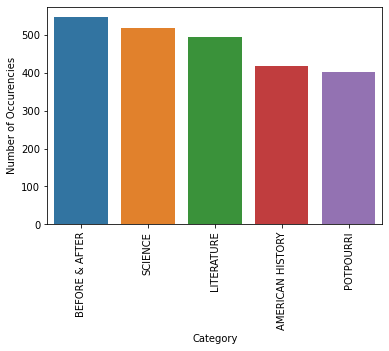

In [155]:
g = sns.barplot(data = most_frequent, x = most_frequent.index, y = most_frequent['Number of Occurencies'])
plt.xticks(rotation = 90)

plt.show()
